In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white', context='notebook', font_scale=1.5)
import requests
from bs4 import BeautifulSoup
import src.scrape_data as sd

In [98]:
def market_frag(sb):
    """Perform simple market fragmentation analysis on Amazon Marketplace data.
    
    Keyword arguments:
    sb -- webpage attributes to be analyzed
    """
    brands = []

    for i in range(50):
        temp = sb.Title[i].split()[:10]
        bn = temp[0]
        brands.append(bn)

    brands = pd.DataFrame(brands, columns=['Name'])

    products = sb['Title']

    brand_counts = pd.DataFrame([brands.Name.value_counts()])
    # brand_counts = brand_counts.rename(columns={"Arm": "Arm_&_Hammer", "Mrs.": "Mrs_Meyers"})

    brand_idxs = pd.DataFrame([[k, v.values]
        for k,v in brands.groupby('Name').groups.items()], 
            columns=['Name', 'Indices'])

    n_brands = brand_counts.size

    reviews_by_brand = pd.DataFrame(np.zeros((n_brands, 2)), columns=['Brand', 'Num_Reviews'])

    n_reviews = 0

    for i in range(n_brands):
        brand = brand_idxs.loc[i]['Name']
        n_products = brand_idxs.loc[i]['Indices'].size
        for j in range(n_products):
            n_reviews += sb['Num_Reviews'].loc[brand_idxs.loc[i]['Indices'][j]]
        reviews_by_brand.loc[i] = [brand, n_reviews]
        n_reviews = 0

    total_reviews = reviews_by_brand['Num_Reviews'].sum()

    hhi = 0

    for i in range(n_brands):
        hhi += (reviews_by_brand['Num_Reviews'].loc[i]/total_reviews)**2

    return brand_counts, products, hhi 

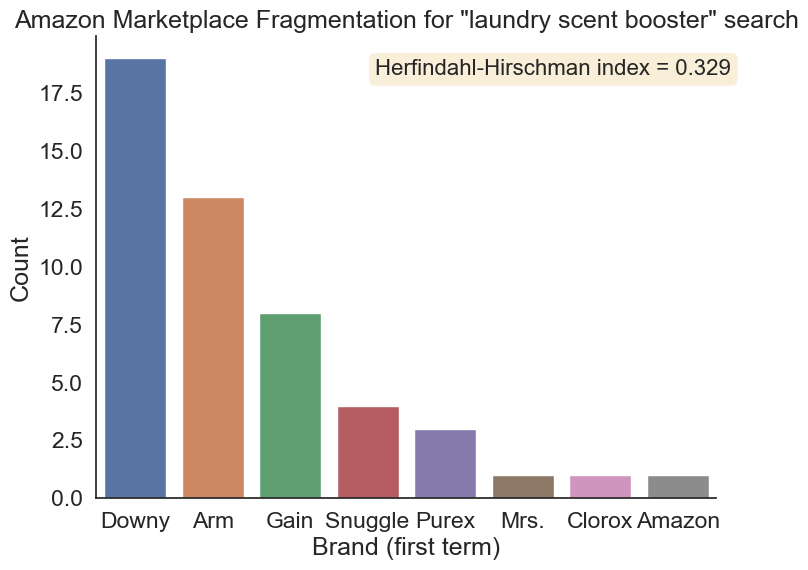

In [128]:
## Scrape product data from the first page of search results on Amazon with the search term "laundry scent booster" ordered by "Featured"

sb = sd.scrape_data("https://www.amazon.com/s?k=laundry+scent+booster&crid=15IJ88INZZP4B&sprefix=laundry+scent+booster%2Caps%2C197&ref=nb_sb_noss_1")
sb.Num_Reviews = sb.Num_Reviews.replace(',','', regex=True)
sb['Num_Reviews'] = pd.to_numeric(sb['Num_Reviews'], errors='coerce')

brand_counts, products, hhi  = market_frag(sb)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=brand_counts)
sns.despine()
ax.set(xlabel='Brand (first term)', ylabel='Count', title='Amazon Marketplace Fragmentation for "laundry scent booster" search')
# fig.autofmt_xdate(rotation=45)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.45, 0.95, 'Herfindahl-Hirschman index = ' + str(round(hhi, 3)), transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props);

path = r'C:\Projects\pypc\results\market_frag_standard_booster.svg'
fig.savefig(path, format='svg', dpi=1200)


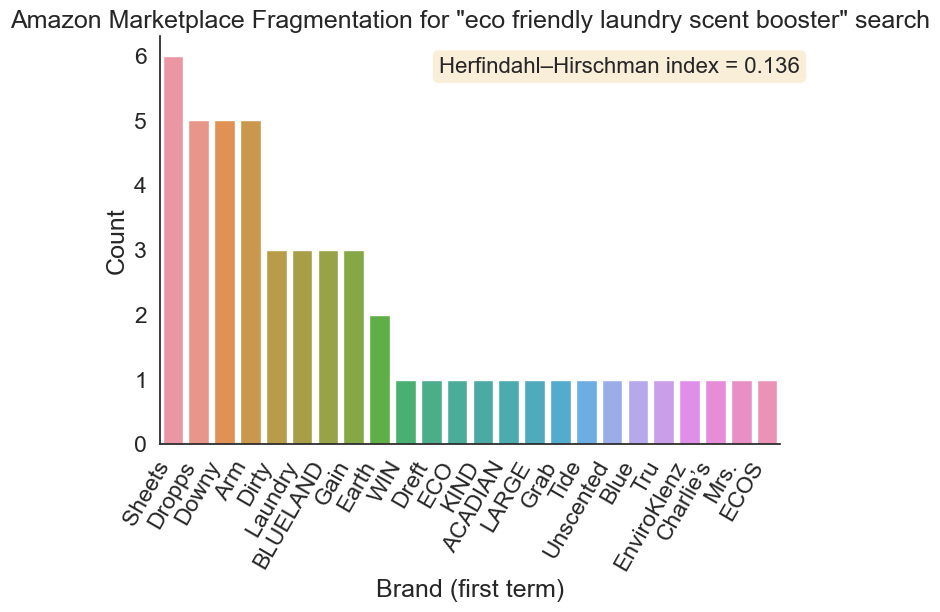

In [129]:
## Scrape product data from the first page of search results on Amazon with the search term "eco friendly laundry scent booster" ordered by "Featured"

sb = sd.scrape_data("https://www.amazon.com/s?k=eco+friendly+laundry+scent+booster&crid=3B4NHFLO7LE6E&sprefix=eco+friendly+laundry+scent+booster%2Caps%2C64&ref=nb_sb_noss_1")
sb.Num_Reviews = sb.Num_Reviews.replace(',','', regex=True)
sb['Num_Reviews'] = pd.to_numeric(sb['Num_Reviews'], errors='coerce')

brand_counts, products, hhi  = market_frag(sb)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.barplot(data=brand_counts)
sns.despine()
ax.set(xlabel='Brand (first term)', ylabel='Count', title='Amazon Marketplace Fragmentation for "eco friendly laundry scent booster" search')
fig.autofmt_xdate(rotation=60, ha='right')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.45, 0.95, 'Herfindahl–Hirschman index = ' + str(round(hhi, 3)), transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props);

path = r'C:\Projects\pypc\results\market_frag_eco_booster.svg'
fig.savefig(path, format='svg', dpi=1200)